In [1]:
import modules.io as io

In [2]:
DATA_KEY    = "TRAIN"
CONFIG_FILE = "./config/googlenet_c30_train300k_aug10_clean_point.yaml"

config      = io.load_yaml(CONFIG_FILE)

In [3]:
import factories.dataset_factory as dataset_factory

data    = dataset_factory.get(config, DATA_KEY)

4it [00:00, 37.26it/s]

centering images


7860it [03:11, 41.14it/s]
100%|██████████| 39300/39300 [08:04<00:00, 81.14it/s]


In [4]:
import factories.model_factory as model_factory

model = model_factory.get(config)

/home/marsdenlab/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


pool 1 Tensor("googlenet/max_pool:0", shape=(?, 79, 79, 64), dtype=float32)
pool_2 Tensor("googlenet/max_pool_1:0", shape=(?, 39, 39, 192), dtype=float32)
pool 3 Tensor("googlenet/max_pool_2:0", shape=(?, 19, 19, 480), dtype=float32)
pool side Tensor("googlenet/avg_pool:0", shape=(?, 5, 5, 833), dtype=float32)
[None, 3200]
[None, 1024]
pool 5 Tensor("googlenet/max_pool_3:0", shape=(?, 9, 9, 833), dtype=float32)
pool final Tensor("googlenet/avg_pool_1:0", shape=(?, 3, 3, 1024), dtype=float32)
[None, 9216]
[None, 1024]
Tensor("googlenet/output/Identity:0", shape=(?, 30), dtype=float32)
Tensor("googlenet/side_output/Identity:0", shape=(?, 30), dtype=float32)


In [5]:
import factories.preprocessor_factory as prepro_factory

preprocessor = prepro_factory.get(config)

/home/marsdenlab/projects/seg_regression/components/common.py:8: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/marsdenlab/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/marsdenlab/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/marsdenlab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/marsdenlab/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/marsdenlab/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, i

In [6]:
import factories.trainer_factory as trainer_factory

trainer = trainer_factory.get(config)

trainer.setup_directories()

In [7]:
trainer.set_data(data, DATA_KEY)
trainer.set_preprocessor(preprocessor)

In [8]:
trainer.set_model(model)

(39300, 160, 160)
(39300, 160, 160, 1)
(39300, 30)
0: loss=0.162566676735878

yhat = [0.5037477  0.49597204 0.46952474 0.47819078 0.48410833 0.47292674
 0.48040998 0.47784483 0.48089343 0.4906687  0.48648494 0.47370207
 0.4840433  0.48195067 0.48028576 0.4825221  0.48461992 0.47783265
 0.4863269  0.4981741  0.4843309  0.4723524  0.488089   0.47920027
 0.46988675 0.49245536 0.4781246  0.4750403  0.482943   0.47239557]


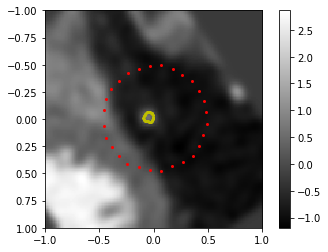

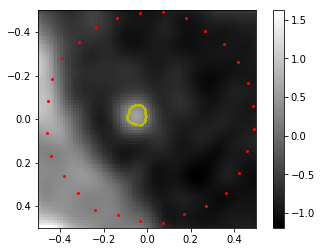

0: loss=0.003433207981288433

yhat = [0.50642616 0.49476868 0.47216213 0.47823298 0.48260048 0.4744648
 0.480169   0.4761367  0.48454827 0.49309018 0.48250768 0.47983468
 0.48673353 0.48317668 0.47673208 0.48664492 0.48460087 0.47401386
 0.4876816  0.49177572 0.48548535 0.47851798 0.49628147 0.47918418
 0.4700026  0.49378818 0.47900918 0.4770809  0.4824828  0.4683999 ]


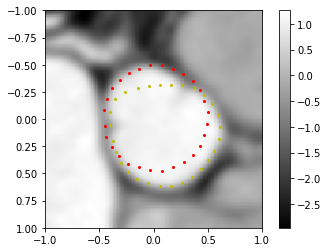

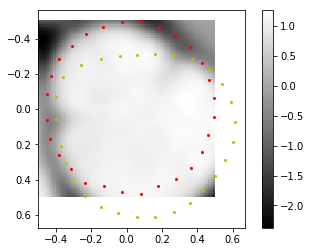

1000: loss=0.0025403816252946854

yhat = [0.50499517 0.5228374  0.04583501 0.04886366 0.04660897 0.04873094
 0.04626841 0.0457098  0.04468869 0.04609517 0.04550835 0.04862684
 0.04889274 0.04760909 0.04657941 0.04637921 0.04682193 0.04881502
 0.04657862 0.04561999 0.0456389  0.05043255 0.04987016 0.05052282
 0.04922809 0.04569818 0.04869098 0.04722628 0.04825542 0.04734396]


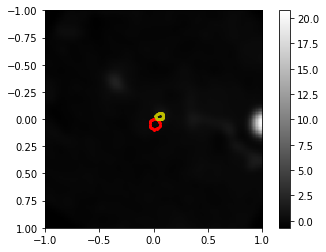

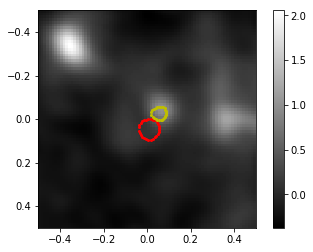

1000: loss=0.06777773797512054

yhat = [0.49391425 0.5033996  0.26459572 0.26590753 0.2651719  0.26452845
 0.27239046 0.266213   0.26772135 0.2586266  0.26266277 0.2700504
 0.27005747 0.2666789  0.27131638 0.26557654 0.2649625  0.26885635
 0.2622354  0.26344016 0.26753706 0.26662132 0.26562437 0.26308626
 0.2684514  0.2607435  0.27319252 0.27017877 0.26378873 0.26766914]


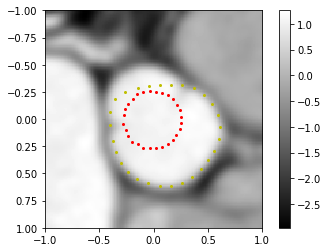

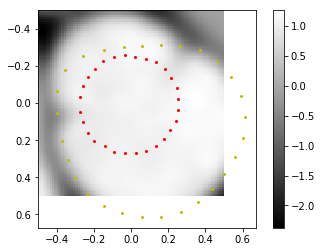

2000: loss=0.0020140917040407658

yhat = [0.49284312 0.4982506  0.40935096 0.41090527 0.408137   0.40225843
 0.4076386  0.413569   0.4210295  0.41610837 0.40850446 0.41378137
 0.41544113 0.4046599  0.4117726  0.39691478 0.4060008  0.41714293
 0.41349453 0.4149624  0.4197295  0.42062286 0.4150932  0.41377917
 0.41513944 0.4132045  0.41826668 0.42471126 0.41217116 0.4134483 ]


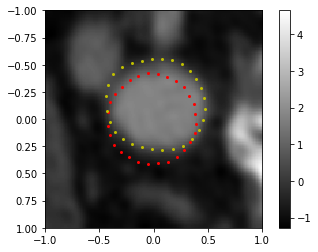

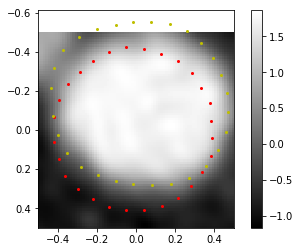

2000: loss=0.028320683166384697

yhat = [0.49715844 0.48871475 0.35828516 0.3551751  0.35201737 0.35009864
 0.35492086 0.35096982 0.36824623 0.359431   0.36011016 0.37001696
 0.3730482  0.3592038  0.3559813  0.35629296 0.35116848 0.35741857
 0.3608747  0.3546611  0.35597512 0.35343754 0.36050263 0.3605271
 0.36155555 0.36781654 0.3610971  0.37536046 0.3628339  0.35909393]


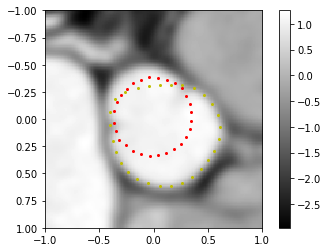

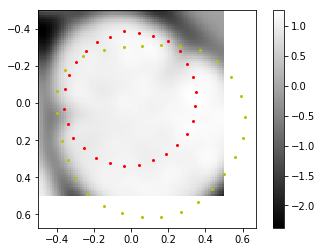

In [ ]:
trainer.train()

In [ ]:
trainer.save()